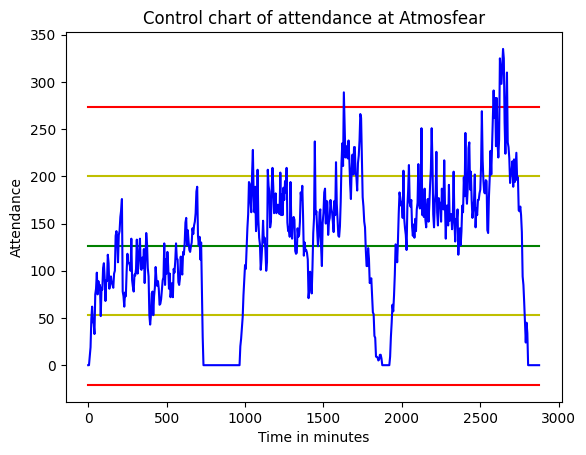

Mean = 126.359375, Standard Deviation = 73.63511071604992


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
connection = sqlite3.connect('timeseries.db')
cursor = connection.cursor()

cursor.execute("SELECT attractionId, Name FROM attraction where attraction.Name = 'Atmosfear';")
attractionID = cursor.fetchone()[0]
cursor.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attractionID) + "%';")
sequences = cursor.fetchall()
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'] \
.apply(lambda s: [1 if x == str(attractionID) else 0 for x in s.split("-")])
attendance = np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)
mean = np.nanmean(attendance)
std = np.nanstd(attendance)
x_axis_list = range(0, len(attendance)*5, 5)
plt.plot(x_axis_list, [mean+2*std]*len(attendance), 'r-')
plt.plot(x_axis_list, [mean-2*std]*len(attendance), 'r-')
plt.plot(x_axis_list, [mean+std]*len(attendance), 'y-')
plt.plot(x_axis_list, [mean-std]*len(attendance), 'y-')
plt.plot(x_axis_list, [mean]*len(attendance), 'g-')
plt.plot(x_axis_list, attendance, 'b-')
plt.ylabel('Attendance')
plt.xlabel('Time in minutes')
plt.title('Control chart of attendance at Atmosfear')
plt.show()
print("Mean = " + str(mean) + ", Standard Deviation = " + str(std))

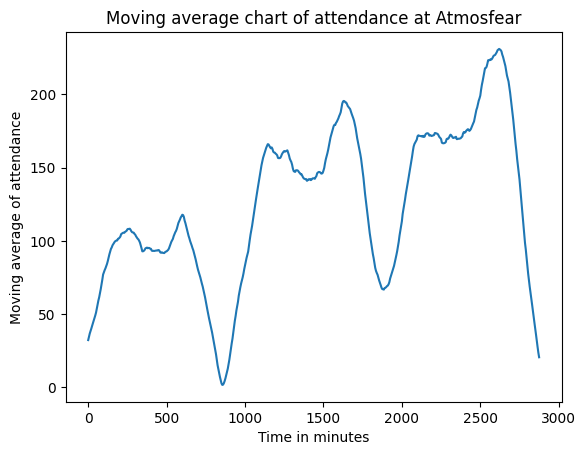

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
connection = sqlite3.connect('timeseries.db')
cursor = connection.cursor()

window_size = 50
plt.plot(x_axis_list, np.convolve(attendance, np.ones(window_size,)/window_size, 'same'), )
plt.ylabel('Moving average of attendance')
plt.xlabel('Time in minutes')
plt.title('Moving average chart of attendance at Atmosfear')
plt.show()

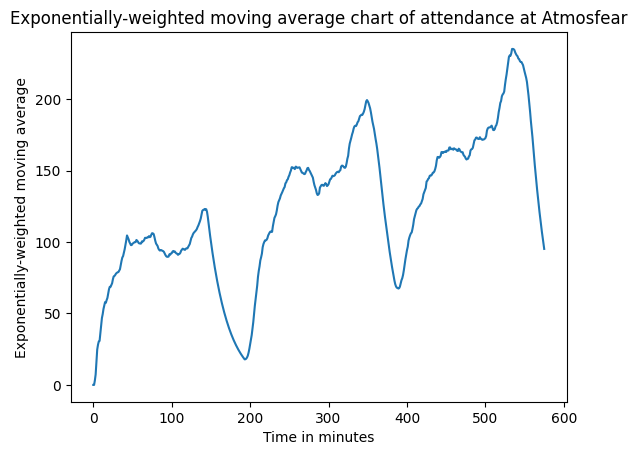

In [3]:
import sqlite3
import matplotlib.pyplot as plt
connection = sqlite3.connect('timeseries.db')
cursor = connection.cursor()

span = 50
df = pd.DataFrame(data=attendance)
df_exp = df.ewm(span=span).mean()
plt.plot(df_exp)
plt.ylabel('Exponentially-weighted moving average')
plt.xlabel('Time in minutes')
plt.title('Exponentially-weighted moving average chart of attendance at Atmosfear')
plt.show()